# Metaheuristics - Lab1

## Objectives
* Getting familiar with different classes of optimization problems
* Reminder of traditional local optimization methods (e.g. gradient method)

## Continuous optimization problems

Local optimization:  for a function $f:D\to R$, $D=[a_1,b_1]\times [a_2,b_2]\times \ldots \times [a_n,b_n]$, find $x^*\in D$,  such that $f(x^*)\leq f(x)$ for all $x\in D$

Test functions
* Sphere function (uni-modal, convex function) $f:R^n\rightarrow R$, $f(x^1,\ldots, x^n)=\sum_{i=1}^n (x^i)^2$ (unique optimum)

* Rosenbrock function (uni-modal, non-convex function) $f:R^n\rightarrow R$, $f(x^1\ldots, x^n)= \sum_{i=1}^{n-1}(100(x^{i+1}-(x^i)^2)^2+(1-x^i)^2)$ 

* Ackley function (multi-modal) $f:R^n\rightarrow R$, $f(x^1\ldots, x^n)=-20\exp(-0.2\sqrt{\frac{1}{2}\sum_{i=1}^n (x^i)^2})-\exp(\frac{1}{2}\sum_{i=1}^n\cos(2\pi x^i))+e+20$


More details: https://www.sfu.ca/~ssurjano/optimization.html


In [9]:

# 2-dimensional case

def Sphere(v):
    x = v[0]
    y = v[1]
    return x**2 + y**2

def Rosenbrock(v):
    x = v[0]
    y = v[1]
    return (1.0 - x)**2 + 100.0*(y - x**2)**2
    

def Ackley(v):
    x=v[0]
    y=v[1]
    term1 = -20 * np.exp(-0.2 * ((1/2.) * (x**2 + y**2)**(0.5)))
    term2 = np.exp((1/2.)*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y)))
    return term1 - term2 + 20 + np.exp(1)

## Function landscape - plot

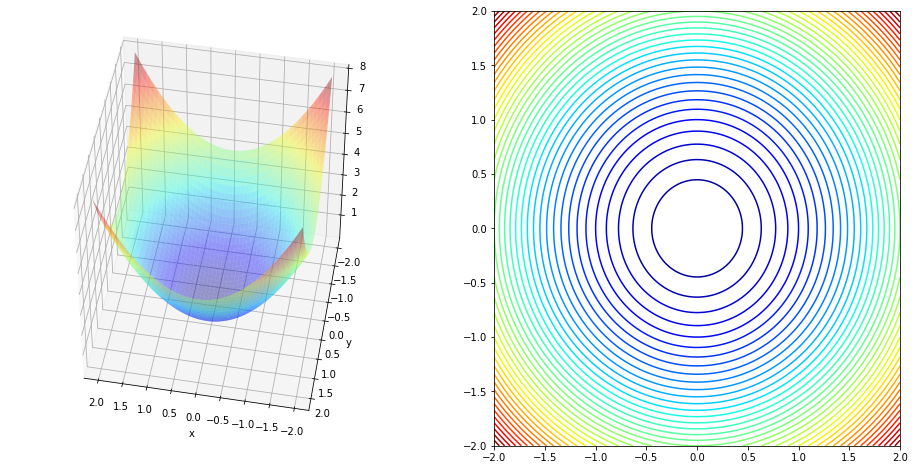

In [11]:
import numpy as np
def FunctionPlot(func, x_start=-2, x_stop=2, y_start=-2, y_stop=2):
    x = np.linspace(x_start,x_stop,250)
    y = np.linspace(y_start,y_stop,250)
    X, Y = np.meshgrid(x, y)
    Z = func([X, Y])

    %matplotlib inline
    import matplotlib.pyplot as plt
    #plt.style.use('seaborn-white')
    from mpl_toolkits import mplot3d

    fig = plt.figure(figsize = (16,8))

    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    
    ax.view_init(45, 100) # view angle
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, 50, cmap = 'jet')
    #Plotting the iterations and intermediate values
    
    #ax.set_title('Function (surface and contour plot)'.format(len(iter_count)))

    plt.show()
    
FunctionPlot(Sphere, x_start=-2, x_stop=2, y_start=-2, y_stop=2)

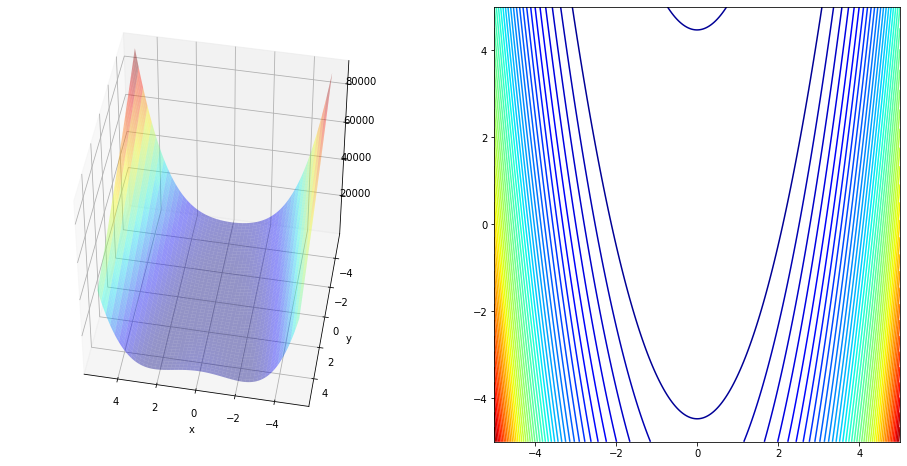

In [12]:
FunctionPlot(Rosenbrock, x_start=-5, x_stop=5, y_start=-5, y_stop=5)

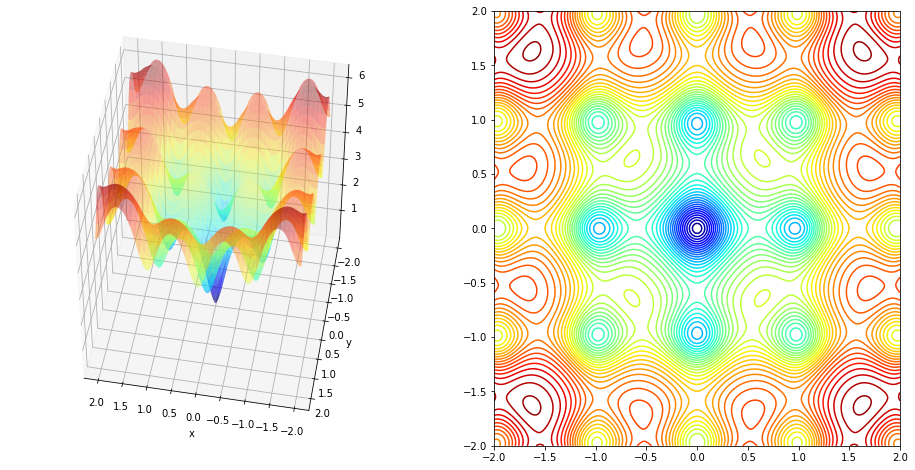

In [15]:
FunctionPlot(Ackley, x_start=-2, x_stop=2, y_start=-2, y_stop=2)

## Gradient based local optimization (first order method)

* iterative method which search in the neigborhood of an initial approximation by following a direction given by the gradient (opposite of the gradient in the case of minimization problem

* Set the initial approximation $x_0\in D$ and the descent step size $\gamma$
* Repeat an adjustment step: $x_{k+1}=x_{k}- \gamma \nabla f(x_{k})$, $k=0,1, \ldots$  until the adjustment is small enough (no significant progress)



In [10]:
import numpy as np

def Grad_Rosenbrock(v):
    x = v[0]
    y = v[1]
    gx = -400*x*y + 400*x**3 + 2*x -2
    gy = 200*y -200*x**2
    return np.array([gx,gy])
    
def Grad_Sphere(v):
    x = v[0]
    y = v[1]
    gx=2*x
    gy=2*y
    return np.array([gx,gy])


def Gradient_Descent(Grad,x,y, gamma = 0.00125, epsilon=0.0001, kMax = 10000):
    # kMax - maximum iterations number
    #Initialization
    k = 0
    iter_x, iter_y, iter_count = np.empty(0), np.empty(0), np.empty(0)
    error = Grad([x,y])
    S = np.array([x,y])
    
    #Looping as long as the norm of the gradient is greater than epsilon
    while np.linalg.norm(error) > epsilon and k < kMax:
        k +=1
        iter_x = np.append(iter_x,x)
        iter_y = np.append(iter_y,y)
        iter_count = np.append(iter_count ,k)   
        
        S_prev = S
        S = S - gamma * Grad([x,y])
        error = Grad([x,y]) #S - S_prev
        x,y = S[0], S[1]
          
    print('Solution',S)
    return S, iter_x, iter_y, iter_count

root,iter_x,iter_y, iter_count = Gradient_Descent(Grad_Sphere, -2, 2)

Solution [-3.52501327e-05  3.52501327e-05]


#### Questions
* Does the initial approximation have an influence on the result?
* Does the value of the step size ($\gamma$) have an influence on the result?

### Graphical illustration of the optimization process


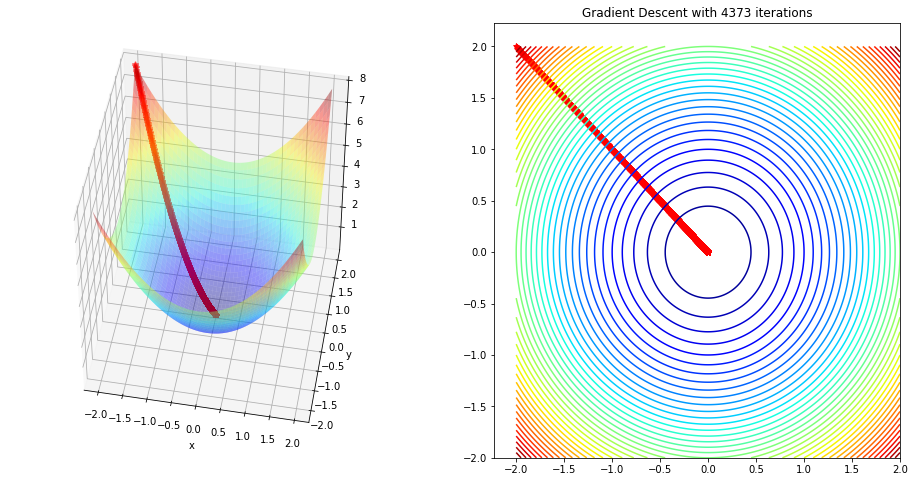

In [12]:
def Graphical_representation(func, iter_x, iter_y, x_start=-2, x_stop=2, y_start=-2, y_stop=2):
    x = np.linspace(x_start,x_stop,250)
    y = np.linspace(y_start,y_stop,250)
    X, Y = np.meshgrid(x, y)
    Z = func([X, Y])

    #Angles needed for quiver plot
    anglesx = iter_x[1:] - iter_x[:-1]
    anglesy = iter_y[1:] - iter_y[:-1]

    %matplotlib inline
    import matplotlib.pyplot as plt
    #plt.style.use('seaborn-white')
    from mpl_toolkits import mplot3d

    fig = plt.figure(figsize = (16,8))

    #Surface plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
    ax.plot(iter_x,iter_y, func([iter_x,iter_y]),color = 'r', marker = '*', alpha = .4)

    ax.view_init(45, 280)
    ax.set_xlabel('x')
    ax.set_ylabel('y')


    #Contour plot
    ax = fig.add_subplot(1, 2, 2)
    ax.contour(X,Y,Z, 50, cmap = 'jet')
    #Plotting the iterations and intermediate values
    ax.scatter(iter_x,iter_y,color = 'r', marker = '*')
    ax.quiver(iter_x[:-1], iter_y[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .3)
    ax.set_title('Gradient Descent with {} iterations'.format(len(iter_count)))


    plt.show()
    
Graphical_representation(Sphere, iter_x, iter_y, x_start=-2, x_stop=2, y_start=-2, y_stop=2)

Solution [0.99816015 0.99631631]


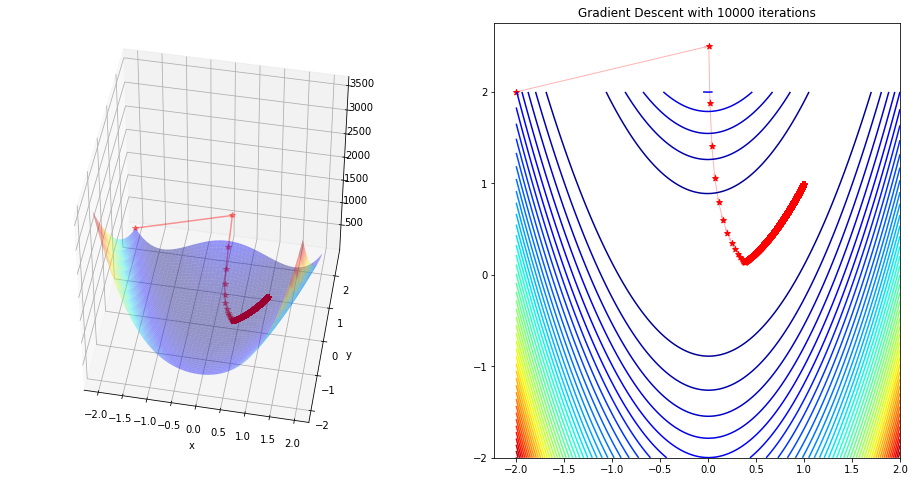

In [13]:
root,iter_x,iter_y, iter_count = Gradient_Descent(Grad_Rosenbrock, -2, 2)
Graphical_representation(Rosenbrock, iter_x, iter_y, x_start=-2, x_stop=2, y_start=-2, y_stop=2)

### Exercise 1:  
Define the Python function to compute the gradient of the Ackley function and illustrate the optimization process in the case of the Ackley function

### Second order methods 
* these methods involve second order derivatives, i.e. the Hessian matrix $H$ (matrix containing the second order derivatives, e.g. $H_{i,j}(f(x))=\frac{\partial^2 f(x^1,\ldots,x^n)}{\partial x^i\partial x^j}$, $i=\overline{1,n}$, $j=\overline{1,n}$
* in the case of the Newton method the iterative process involves the inverse of the Hessian matrix:
  $x_{k+1}=x_k- \gamma (H(f(x_k)))^{-1} \nabla f(x_k)$.
* the second order methods have a higher speed of convergence but they require the computation of second order derivatives and the inverse of the Hessian function

The scipy.optimize library contains several Newton-like methods as well as other optimization algorithms (https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html).
  


In [29]:

from  scipy import optimize
# optimize.rosen ->  Rosenbrock function as it is defined in scipy library
x0 = [2, -1]
#Newton-Conjugate-Gradient algorithm
rez = optimize.minimize(optimize.rosen, x0, method="Newton-CG", jac=optimize.rosen_der, hess=optimize.rosen_hess, options={'xtol': 1e-8, 'disp': True})  
print("Newton-Conjugate-Gradient", rez)

# Broyden-Fletcher-Goldfarb-Shanno algorithm 
rez = optimize.minimize(Rosenbrock, x0, method='BFGS', jac=Grad_Rosenbrock, options={'gtol': 1e-6, 'disp': True})
rez = optimize.minimize(optimize.rosen, x0, method='BFGS', jac=optimize.rosen_der, options={'disp': True})
print("Broyden-Fletcher-Goldfarb-Shanno algorithm", rez)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 37
         Function evaluations: 46
         Gradient evaluations: 82
         Hessian evaluations: 37
Newton-Conjugate-Gradient      fun: 2.5922310218606495e-16
     jac: array([  5.33935899e-06,  -2.68043623e-06])
 message: 'Optimization terminated successfully.'
    nfev: 46
    nhev: 37
     nit: 37
    njev: 82
  status: 0
 success: True
       x: array([ 0.99999998,  0.99999997])
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 54
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 38
         Function evaluations: 54
         Gradient evaluations: 54
Broyden-Fletcher-Goldfarb-Shanno algorithm       fun: 8.401403311549425e-18
 hess_inv: array([[ 0.50005755,  1.00018607],
       [ 1.00018607,  2.00554496]])
      j

### Exercises

1. Apply the optimization methods from scipy (BFGS, Newton-CG, trust-ncg, trust-krylov) for the Rosenbrock function of various dimensions ($n=2,3,4,5,10$) and compare the results with respect to: (i) the value of the objective function; (ii) the number of iterations; (iii) the number of function evaluations; (iv) the number of gradient evaluations.

2. Apply the optimization functions from scipy.optimize to estimate the minimum for the Sphere and Ackley functions



### Combinatorial optimization problems
 
* resource allocation problems
* vehicle routing problems



### Resource allocation problem

* some (possible conflicting) software components should be instantiated on several virtual machines (VM) in such a way that the total number of VMs is minimized
* the problem can be formulated as a integer linear programming (ILP) problem 

* Example:  usage of PuLP (Python Linear Programming - https://pythonhosted.org/PuLP/)

* Steps:
 *  problem formalization
 *  description in PuLP
 *  running the solver

    

In [7]:
import pulp

class Application:
    def __init__(self, nr_components, nr_vms):
        self.nr_comps = nr_components
        self.nr_vms = nr_vms
        self.__createModel()
        
    def __createModel(self):
        self.model = pulp.LpProblem("Placing components on a VM", pulp.LpMinimize)

        #variables
        self.vms = ["VM" + str(i + 1) for i in range(self.nr_vms)]
        self.comps = ["C" + str(i + 1) for i in range(self.nr_comps)]
        
        # assignment matrix  a[i,j]=1 if component i is assigned to VM j, a[i,j]=0 otherwise
        self.a = pulp.LpVariable.dicts("a", ((i, j) for i in self.comps for j in self.vms), lowBound=0, upBound=1,
                                       cat=pulp.LpInteger)
        
        # vector of used VMs vm[j]=1 if VM j is used, vm[j]=0 otherwise
        self.vm = pulp.LpVariable.dicts("vm", (j for j in self.vms), lowBound=0, upBound=1, cat=pulp.LpInteger)
        
        # objective function:  number of used VMs (to be minimized)
        self.model += pulp.lpSum([self.vm[j] for j in self.vms])
        
        #General constraints
        self.__GC1()
        self.__GC2()
        
    def __GC1(self):
        """each component is instantiated at least once"""
        """at least one instance of a component is deployed on each acquired VM"""
        for i in self.comps:
            self.model += pulp.lpSum([self.a[i, j] for j in self.vms]) >= 1
            
    def __GC2(self):
        """The components are deployed only on acquired VM"""
        for j in self.vms:
            for i in self.comps:
                self.model += self.a[i, j] <= self.vm[j]
                
    def componentConflictConstraint(self, alphaCompID, conflictCompsIDList):
        """
        Constraint that describes the conflicts between components
        :param alphaComponentId - ID of the component that is in conflict with other components, ID should be
         in set {1,...,N} (N=number of components)
        :param conflictCompsIDList - the list of components IDs which are in a conflict with the component alphaComponent is in conflict
        """
        alphaComp = "C"+str(alphaCompID)
        #print('----------SC1--------------')
        conflictComps = []
        for i in conflictCompsIDList: conflictComps.append("C"+str(i))
        #print('alphaCompID',conflictCompsIDList)
        for j in self.vms:
            for i in conflictComps:
                self.model += pulp.lpSum([self.a[alphaComp, j], self.a[i, j]]) <= 1


    def componentNumberConstraint(self, compsIdList, n1, n2, operation):
        """
        Constrains that defines the number of instances that a component must have
        :param compsIdList:
        :param n1: a positive limit for components number
        :param n2: a positive limit for components number
        :param operation: should be one of the strings {"<=","==",">=","in"}
            "<=": sum(compsIdList) <= n1
            ">=": sum(compsIdList) >= n1
            "==": sum(compsIdList) == n1
            "in": n1 <= sum(compsIdList) <= n2
        """
        compsList = []
        for i in compsIdList:
            compsList.append("C" + str(i))

        #print('----------SC2--------------')

        if operation == "<=":
            self.model += pulp.lpSum([self.a[i, j] for i in compsList for j in self.vms]) <= n1

        elif operation == ">=":
            self.model += pulp.lpSum([self.a[i, j] for i in compsList for j in self.vms]) >= n1

        elif operation == "==":
            self.model += pulp.lpSum([self.a[i, j] for i in compsList for j in self.vms]) == n1

        elif operation == "in":
            self.model += pulp.lpSum([self.a[i, j] for i in compsList for j in self.vms]) >= n1
            self.model += pulp.lpSum([self.a[i, j] for i in compsList for j in self.vms]) <= n2
        
    def componentsNumberDependencyConstraint(self, alphaCompId, betaCompId, operation):
        """
        The number of instance of component alpha depends on the number of instances of component beta
        :param alphaCompId: ID of component alpha, ID should be in set {1,...,N}
        :param betaCompId: ID of component beta, ID should be in set {1,...,N}
        :param operation: one of the strings in set {"==", "<=", ">="}
            "==": sum(instances of alpha component) == sum(instances of beta component)
            "<=": sum(instances of alpha component) <= sum(instances of beta component)
            ">=": sum(instances of alpha component) >= sum(instances of beta component)
        :return: None
        """
        alphaComp = "C" +str(alphaCompId)
        betaComp = "C" + str(betaCompId)
        if operation == "<=":
            self.model += pulp.lpSum([self.a[alphaComp, j] for j in self.vms]) <= pulp.lpSum([self.a[betaComp, j] for j in self.vms])
        elif operation == ">=":
            self.model += pulp.lpSum([self.a[alphaComp, j] for j in self.nrVM]) >= pulp.lpSum([self.a[betaComp, j] for j in self.nrVM])
        elif operation == "==":
            self.model += pulp.lpSum([self.a[alphaComp, j] for j in self.nrVM]) == pulp.lpSum([self.a[betaComp, j] for j in self.nrVM])

    def run(self):
        self.model.solve()
       
        best_nr_of_vm = -1
        _vm = []
        _a = []

        if pulp.LpStatus[self.model.status] == "Optimal":
            best_nr_of_vm = pulp.value(self.model.objective)
            print("Objective value:", best_nr_of_vm)

            for vm in self.vms:
                _vm.append(int(pulp.value(self.vm[vm])))

            for i in self.comps:
                line = []
                for j in self.vms:
                    line.append(int(pulp.value(self.a[i,j])))
                _a.append(line)

        return  best_nr_of_vm, _vm, _a   
    
cp = Application(6, 6)

cp.componentConflictConstraint(1, [2, 3, 4])
cp.componentConflictConstraint(2, [3, 4])
cp.componentConflictConstraint(3, [4])
cp.componentConflictConstraint(4, [5])
#cp.componentNumberConstraint([1], 1, None, "==")
#cp.componentNumberConstraint([2, 3], 3, None, ">=")  
#cp.componentsNumberDependencyConstraint(3, 6, "<=")
print (cp.run())


Objective value: 4.0
(4.0, [1, 1, 1, 0, 0, 1], [[0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0]])
